In [1]:
# Importación de librerias para el notebook
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
# Importación de las fuentes de datos
base = pd.read_csv('Input/base_de_datos.csv')
correlaciones = pd.read_csv('Input/correlaciones_precios.csv')
correlaciones_cantidad = pd.read_csv('Input/correlaciones_cantidad.csv')

In [3]:
# elimincación de prefijos para cada una de las variables
correlaciones.Producto1 = correlaciones.Producto1.map(lambda x: x.lstrip('precio_'))
correlaciones.Producto2 = correlaciones.Producto2.map(lambda x: x.lstrip('precio_'))
correlaciones_cantidad.Producto1 = correlaciones_cantidad.Producto1.map(lambda x: x.lstrip('cantidad_'))
correlaciones_cantidad.Producto2 = correlaciones_cantidad.Producto2.map(lambda x: x.lstrip('cantidad_'))

In [4]:
# Elimina filas de producto 1 que sean iguales a producto 2
correlaciones_cantidad = correlaciones_cantidad[correlaciones_cantidad.Producto1 != correlaciones_cantidad.Producto2]

In [5]:
correlaciones_cantidad

,Unnamed: 0,Producto1,Producto2,Correlacion
1,1,BAQ-FRU1-CAT1-111:277:659:660,BAQ-FRU1-CAT1-14:49:115:116,-0.039558
2,2,BAQ-FRU1-CAT1-111:277:659:660,BAQ-FRU1-CAT1-157:273:651:652,-0.091036
3,3,BAQ-FRU1-CAT1-111:277:659:660,BAQ-FRU1-CAT1-15:50:117:118,-0.023699
4,4,BAQ-FRU1-CAT1-111:277:659:660,BAQ-FRU1-CAT1-16:51:119:120,0.063767
5,5,BAQ-FRU1-CAT1-111:277:659:660,BAQ-FRU1-CAT1-19:52:121:122,0.090429
...,...,...,...,...
16852,16852,BAQ-FRU1-CAT6-82:276:657:658,BAQ-FRU1-CAT6-46:61:139:140,0.050023
16853,16853,BAQ-FRU1-CAT6-82:276:657:658,BAQ-FRU1-CAT6-46:61:239:240,0.508780
16854,16854,BAQ-FRU1-CAT6-82:276:657:658,BAQ-FRU1-CAT6-46:61:727:728,-0.081695
16855,16855,BAQ-FRU1-CAT6-82:276:657:658,BAQ-FRU1-CAT6-64:86:193:194,0.102866


In [6]:
# Construcción de una tabla con la lista de los productos con mayor valor en ventas
top_5 = pd.pivot_table(base, values="totalVentasConDescuento", index=['sku', 'producto'], aggfunc='sum').reset_index().sort_values('totalVentasConDescuento', ascending=False)
top_5 = list(top_5.sku[0:5])
top_5

['BAQ-FRU1-CAT2-346:464:1180:1181',
 'BAQ-FRU1-CAT6-64:86:193:194',
 'BAQ-FRU1-CAT1-47:67:151:152',
 'BAQ-FRU1-CAT104105-305509:1018259:1018260:563293',
 'BAQ-FRU1-CAT104105-60271:510131:510132:258690']

In [7]:
def strong_correlations(sku, _df1=correlaciones_cantidad, _df2 = correlaciones, top = top_5):
    temp_df1 = _df1[_df1.Producto1==sku]
    temp_df1 = temp_df1[~temp_df1.Producto2.isin(top)]
    temp_df1['abs'] = np.abs(temp_df1.Correlacion)
    temp_df1.sort_values('abs', ascending=False, inplace=True)
    temp_df1["Tipo"] = "Cantidad"
    temp_df1 = temp_df1[['Producto2','Correlacion', 'Tipo']][:10]

    temp_df2 = _df2[_df2.Producto1==sku]
    temp_df2 = temp_df2[~temp_df2.Producto2.isin(top)]
    temp_df2['abs'] = np.abs(temp_df2.Correlacion)
    temp_df2.sort_values('abs', ascending=False, inplace=True)
    temp_df2["Tipo"] = "Precio"
    temp_df2 = temp_df2[['Producto2','Correlacion','Tipo']][:10]

    frames = [temp_df1,temp_df2]
    frames = pd.concat(frames)

    return frames[frames.Producto2.duplicated()==False]

In [8]:
#Observemos por ejemplo las correlaciones en demanda y precio que tienen mayor correlación con el Ñame
strong_correlations('BAQ-FRU1-CAT104105-60271:510131:510132:258690')

,Producto2,Correlacion,Tipo
6570,BAQ-FRU1-CAT6-234:304:750:770,0.533159,Cantidad
6487,BAQ-FRU1-CAT1-440:579:1507:1508,0.437724,Cantidad
6573,BAQ-FRU1-CAT6-43:73:164:863,0.406952,Cantidad
6512,BAQ-FRU1-CAT104107-16:261839:261840:142273,-0.279889,Cantidad
6467,BAQ-FRU1-CAT1-16:51:119:120,-0.274856,Cantidad
6511,BAQ-FRU1-CAT104105-73435:169267:169268:92127,0.272664,Cantidad
6541,BAQ-FRU1-CAT2-370:628:1616:1617,0.271714,Cantidad
6475,BAQ-FRU1-CAT1-241:367:958:959,0.262810,Cantidad
6514,BAQ-FRU1-CAT104107-330:254488:254489:139111,-0.259347,Cantidad
6545,BAQ-FRU1-CAT2-394:621:1602:1603,0.248345,Cantidad


In [9]:
def base_estudio(sku,_df=base):
    base_estudio = _df[_df.sku==sku]
    base_cantidad = pd.pivot_table(base_estudio, values="precio", index=['fecha'], aggfunc='mean').reset_index()
    base_precio = pd.pivot_table(base_estudio, values="cantidad", index=['fecha'], aggfunc='sum').reset_index()
    base_estudio = pd.merge(base_precio, base_cantidad, on='fecha', how='left')

    return base_estudio

def base_consolidada(sku):
    base_x = base_estudio(sku)
    str_corr = list(strong_correlations(sku).Producto2)

    for i in str_corr:
        base_i = base_estudio(i)
        base_i = base_i[['fecha','precio']]
        base_i.rename(columns={'precio':str(i)}, inplace=True)
        base_x = pd.merge(base_x,base_i, on="fecha", how='left')

    base_x.ffill(inplace=True)
    base_x.bfill(inplace=True)

    return base_x

In [10]:
base_prod = base_consolidada('BAQ-FRU1-CAT104105-60271:510131:510132:258690')

In [11]:
base_prod.dropna()
base_prod

,fecha,cantidad,precio,BAQ-FRU1-CAT6-234:304:750:770,BAQ-FRU1-CAT1-440:579:1507:1508,BAQ-FRU1-CAT6-43:73:164:863,BAQ-FRU1-CAT104107-16:261839:261840:142273,BAQ-FRU1-CAT1-16:51:119:120,BAQ-FRU1-CAT104105-73435:169267:169268:92127,BAQ-FRU1-CAT2-370:628:1616:1617,...,BAQ-FRU1-CAT2-394:621:1602:1603,BAQ-FRU1-CAT6-46:61:727:728,BAQ-FRU1-CAT6-658:852:2157:2158,BAQ-FRU1-CAT104105-370:393813:393814:210159,BAQ-FRU1-CAT1-279:366:956:957,BAQ-FRU1-CAT104105-54:569323:569324:286789,BAQ-FRU1-CAT1-14:49:115:116,BAQ-FRU1-CAT1-157:273:651:652,BAQ-FRU1-CAT1-20:53:123:124,BAQ-FRU1-CAT104105-73423:168376:168377:92108
0,2022-07-30,951,3955.090909,1286.770833,31300.0,2400.000000,10751.000000,11271.0,1840.0,5187.0,...,2575.0,3690.0,1090.000000,4998.300000,3260.0,3860.0,3192.000000,3398.076923,12255.0,4515.000000
1,2022-08-01,831,4025.591837,1285.641975,31300.0,2400.000000,10751.000000,11271.0,1840.0,5187.0,...,2575.0,4510.0,1090.000000,4998.300000,3260.0,3860.0,3192.000000,3646.842105,12255.0,4515.000000
2,2022-08-02,291,4215.365385,1219.777778,31300.0,2796.000000,10751.000000,11271.0,1840.0,5187.0,...,2575.0,4510.0,1030.000000,4998.300000,3260.0,3860.0,3192.000000,3646.666667,12255.0,4515.000000
3,2022-08-03,408,3831.558442,1185.651685,31300.0,3062.727273,10659.000000,11220.0,1840.0,5187.0,...,2580.0,3830.0,1023.888889,4998.300000,3260.0,3860.0,3385.750000,3553.750000,12255.0,4515.000000
4,2022-08-04,1248,3208.823529,1180.750000,31150.0,2736.666667,10659.000000,11271.0,1840.0,5187.0,...,3040.0,2750.0,1020.000000,4998.300000,3260.0,3860.0,3634.857143,3536.216216,12255.0,4515.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,2023-01-04,348,4874.358209,2752.511111,29160.0,2100.000000,5386.000000,6732.0,1600.0,5187.0,...,7500.0,5675.0,2537.000000,2226.000000,5610.0,2690.0,6825.000000,2133.596491,17167.0,4998.000000
67,2023-01-05,351,4864.967213,2773.173913,29160.0,2406.923077,5386.000000,6732.0,1600.0,5187.0,...,7500.0,5675.0,2568.090909,2226.000000,5610.0,2755.0,6825.000000,2542.293578,17167.0,4998.000000
68,2023-01-06,330,4853.824561,2788.139535,29160.0,2520.000000,5386.000000,6732.0,1600.0,5187.0,...,7500.0,5675.0,2572.285714,2226.000000,5610.0,2725.0,6825.000000,2969.538462,17167.0,4998.000000
69,2023-01-07,309,4841.000000,2651.642857,29160.0,2052.972973,5386.000000,6732.0,1600.0,5187.0,...,7500.0,5675.0,2384.480000,2164.702703,5610.0,2725.0,6608.333333,3083.875969,15990.0,3576.800000


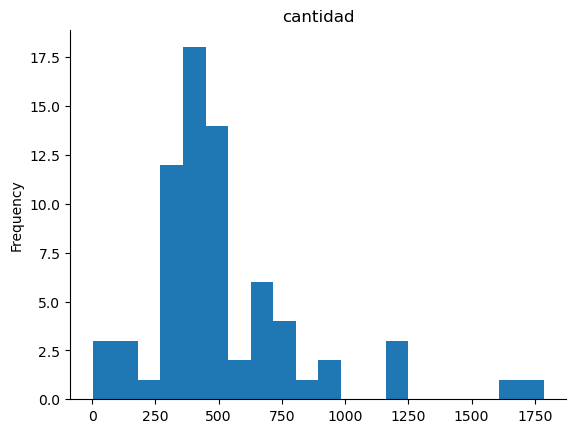

In [12]:
# Distribución de la variable objetivo (Cantidad)
from matplotlib import pyplot as plt
base_prod['cantidad'].plot(kind='hist', bins=20, title='cantidad')
plt.gca().spines[['top', 'right',]].set_visible(False)

C:\Users\crama\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\crama\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\crama\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\crama\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_con

<AxesSubplot:xlabel='fecha', ylabel='cantidad'>

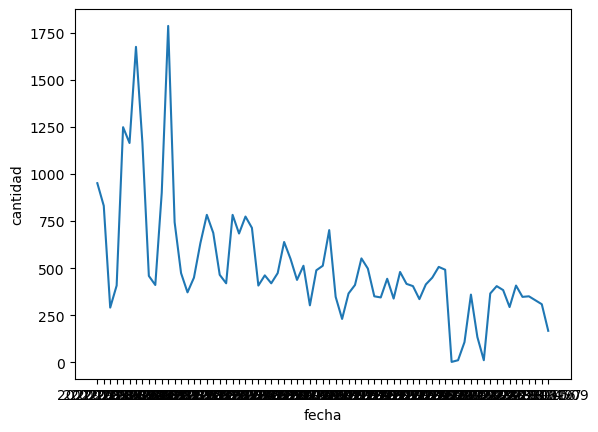

In [13]:
# Comportamiento de las cantidades vendidas durante el tiempo
sns.lineplot(data=base_prod, x="fecha", y="cantidad")

In [14]:
# correlaciones de la variable objetivo vs las demas variables de la tabla base
corr_name = base_prod.drop(columns="fecha").corr()
corr_name.cantidad

cantidad                                        1.000000
precio                                         -0.574713
BAQ-FRU1-CAT6-234:304:750:770                  -0.413063
BAQ-FRU1-CAT1-440:579:1507:1508                 0.255506
BAQ-FRU1-CAT6-43:73:164:863                     0.434156
BAQ-FRU1-CAT104107-16:261839:261840:142273      0.660383
BAQ-FRU1-CAT1-16:51:119:120                     0.621534
BAQ-FRU1-CAT104105-73435:169267:169268:92127   -0.185401
BAQ-FRU1-CAT2-370:628:1616:1617                      NaN
BAQ-FRU1-CAT1-241:367:958:959                   0.368825
BAQ-FRU1-CAT104107-330:254488:254489:139111     0.530435
BAQ-FRU1-CAT2-394:621:1602:1603                -0.312178
BAQ-FRU1-CAT6-46:61:727:728                    -0.645849
BAQ-FRU1-CAT6-658:852:2157:2158                -0.436852
BAQ-FRU1-CAT104105-370:393813:393814:210159     0.637810
BAQ-FRU1-CAT1-279:366:956:957                  -0.594939
BAQ-FRU1-CAT104105-54:569323:569324:286789      0.505429
BAQ-FRU1-CAT1-14:49:115:116    

In [15]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

Xdf = base_prod.drop(columns=['fecha', 'cantidad','BAQ-FRU1-CAT6-43:73:164:863','BAQ-FRU1-CAT104107-330:254488:254489:139111',
                             'BAQ-FRU1-CAT104105-73435:169267:169268:92127','BAQ-FRU1-CAT1-157:273:651:652','BAQ-FRU1-CAT1-241:367:958:959',
                             'BAQ-FRU1-CAT104105-54:569323:569324:286789','BAQ-FRU1-CAT1-440:579:1507:1508'])
                              
                              
                              #,'BAQ-FRU1-CAT2-370:628:1616:1617','BAQ-FRU1-CAT1-16:51:119:120',
                             #'BAQ-FRU1-CAT1-279:366:956:957','BAQ-FRU1-CAT1-20:53:123:124','BAQ-FRU1-CAT104107-16:261839:261840:142273',
                             #'BAQ-FRU1-CAT1-14:49:115:116','BAQ-FRU1-CAT104105-370:393813:393814:210159',
                             #'BAQ-FRU1-CAT6-46:61:727:728','BAQ-FRU1-CAT6-43:73:164:863','BAQ-FRU1-CAT104105-73423:168376:168377:92108',
                             #'BAQ-FRU1-CAT6-234:304:750:770','BAQ-FRU1-CAT1-440:579:1507:1508','BAQ-FRU1-CAT1-157:273:651:652',
                             #'BAQ-FRU1-CAT104105-73435:169267:169268:92127','BAQ-FRU1-CAT6-658:852:2157:2158',
                             #'BAQ-FRU1-CAT104105-54:569323:569324:286789','BAQ-FRU1-CAT1-241:367:958:959'])#,'BAQ-FRU1-CAT6-43:73:164:863'])

# Calcular el VIF para cada variable
vif_data = pd.DataFrame()
vif_data["Variable"] = Xdf.columns
vif_data["VIF"] = [variance_inflation_factor(Xdf.values, i) for i in range(len(Xdf.columns))]

vif_data

,Variable,VIF
0,precio,10.010570
1,BAQ-FRU1-CAT6-234:304:750:770,22.826080
2,BAQ-FRU1-CAT104107-16:261839:261840:142273,27.532688
3,BAQ-FRU1-CAT1-16:51:119:120,46.467908
4,BAQ-FRU1-CAT2-370:628:1616:1617,2988.012322
5,BAQ-FRU1-CAT2-394:621:1602:1603,10.637381
6,BAQ-FRU1-CAT6-46:61:727:728,11.507318
7,BAQ-FRU1-CAT6-658:852:2157:2158,19.521823
8,BAQ-FRU1-CAT104105-370:393813:393814:210159,35.812529
9,BAQ-FRU1-CAT1-279:366:956:957,35.312647


In [16]:
# Listas de variables con un VIF inferior al 10
var_sel = list(vif_data.Variable[vif_data.VIF < 15])

In [17]:
var_sel

['precio',
 'BAQ-FRU1-CAT2-394:621:1602:1603',
 'BAQ-FRU1-CAT6-46:61:727:728',
 'BAQ-FRU1-CAT104105-73423:168376:168377:92108']

In [18]:
#Definición de roles para el modelo
X = base_prod[var_sel].to_numpy()
y = base_prod.cantidad.to_numpy()

In [19]:
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (71, 4)
Shape of y: (71,)


# Modelado

Modelo para el producto

* 'BAQ-FRU1-CAT2-346:464:1180:1181'
* 'BAQ-FRU1-CAT6-64:86:193:194'
* 'BAQ-FRU1-CAT1-47:67:151:152'
* 'BAQ-FRU1-CAT104105-305509:1018259:1018260:563293'
* **'BAQ-FRU1-CAT104105-60271:510131:510132:258690' (Cebolla Cabezona Blanca Sin Pelar Mixta Kg)**


Se aplica el modelo LR stats

In [20]:
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold

# Definir el número de folds para la validación cruzada
k_folds = 5
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

# Listas para almacenar los resultados de cada fold
mse_list = []
r2_list = []

# Realizar la validación cruzada
for train_index, test_index in kf.split(X):#_train):
    X_train_fold, X_val_fold = X[train_index], X[test_index]
    y_train_fold, y_val_fold = y[train_index], y[test_index]

    # Verificar las dimensiones antes de ajustar el modelo
    print("Shape of X_train_fold:", X_train_fold.shape)
    print("Shape of y_train_fold:", y_train_fold.shape)
    print("Shape of X_val_fold:", X_val_fold.shape)
    print("Shape of y_val_fold:", y_val_fold.shape)    

    # Ajustar el modelo en el fold de entrenamiento
    model = sm.OLS(y_train_fold, sm.add_constant(X_train_fold)).fit()

    # Realizar predicciones en el fold de validación
    y_pred_fold = model.predict(sm.add_constant(X_val_fold))

    # Calcular MSE y R2 en el fold de validación
    mse_fold = np.mean((y_pred_fold - y_val_fold)**2)
    r2_fold = model.rsquared

    # Almacenar los resultados
    mse_list.append(mse_fold)
    r2_list.append(r2_fold)

# Calcular el promedio de MSE y R2
summary = model.summary()
mse_6 = np.mean(mse_list)
r2_6 = np.mean(r2_list)

print(summary)
print("MSE promedio en validación cruzada:", mse_6)
print("R2 promedio en validación cruzada:", r2_6)


Shape of X_train_fold: (56, 4)
Shape of y_train_fold: (56,)
Shape of X_val_fold: (15, 4)
Shape of y_val_fold: (15,)
Shape of X_train_fold: (57, 4)
Shape of y_train_fold: (57,)
Shape of X_val_fold: (14, 4)
Shape of y_val_fold: (14,)
Shape of X_train_fold: (57, 4)
Shape of y_train_fold: (57,)
Shape of X_val_fold: (14, 4)
Shape of y_val_fold: (14,)
Shape of X_train_fold: (57, 4)
Shape of y_train_fold: (57,)
Shape of X_val_fold: (14, 4)
Shape of y_val_fold: (14,)
Shape of X_train_fold: (57, 4)
Shape of y_train_fold: (57,)
Shape of X_val_fold: (14, 4)
Shape of y_val_fold: (14,)
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.697
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     29.97
Date:                Sun, 26 May 2024   Prob (F-statistic):           6.05e-13
Time:                    

In [21]:
pronostico = model.predict(sm.add_constant(X))

(array([ 2.,  1.,  0.,  0.,  1.,  1.,  1.,  2.,  3., 16.,  8.,  1.,  5.,
         7.,  5.,  4.,  4.,  1.,  1.,  1.,  0.,  1.,  1.,  0.,  1.,  0.,
         2.,  0.,  1.,  1.]),
 array([ -62.59757295,  -17.51466206,   27.56824884,   72.65115974,
         117.73407063,  162.81698153,  207.89989242,  252.98280332,
         298.06571422,  343.14862511,  388.23153601,  433.3144469 ,
         478.3973578 ,  523.48026869,  568.56317959,  613.64609049,
         658.72900138,  703.81191228,  748.89482317,  793.97773407,
         839.06064497,  884.14355586,  929.22646676,  974.30937765,
        1019.39228855, 1064.47519945, 1109.55811034, 1154.64102124,
        1199.72393213, 1244.80684303, 1289.88975393]),
 <BarContainer object of 30 artists>)

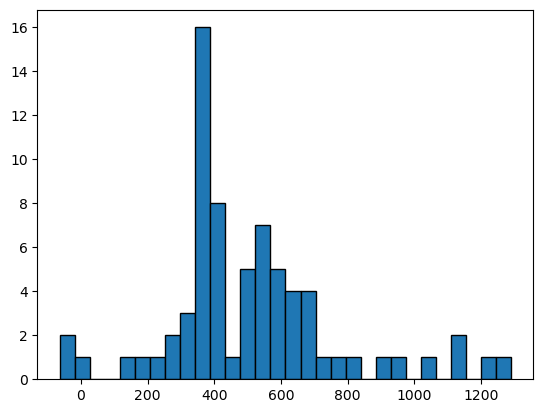

In [22]:
#pronostico.hist()
plt.hist(pronostico, bins=30, edgecolor='black')
#pronostico.plot(kind='hist', bins=20, title='cantidad')
#plt.gca().spines[['top', 'right',]].set_visible(False)

In [23]:
pronostico.shape

(71,)

In [24]:
print(pronostico)

[ 743.86075713  323.88469432  321.04484035  674.77371616 1289.88975393
 1052.51881164 1119.37833342  932.15371478  915.08979358  834.94986255
 1145.08501616 1223.35692649  753.98059443  586.63435755  586.9898906
  663.58540547  619.3539662   600.06816315  676.17288945  626.17839783
  379.40032985  379.36273627  377.46496537  639.76774684  661.01272556
  467.64739209  485.61014028  534.16045864  547.05846133  496.39891651
  430.11718338  418.28505692  627.74558504  490.42158528  525.38636153
  537.91064876  550.62275219  571.25189032  552.04296841  543.18719599
  360.85445746  366.15108125  380.10236019  382.23800612  381.88307541
  381.88307541  381.88307541  393.41872329  404.96731297  415.37179473
  419.13191837  417.92422458  417.57924819  506.5677446   522.55115173
  -44.216197    -62.59757295    8.20176534  576.39468971  355.93382663
  387.07348757  300.93035678  295.79153931  221.68256674  272.17314608
  351.57523949  354.88520639  355.02573734  355.19248083  178.20296431
  131.0

# Guardado del modelo elegido

In [25]:
import pickle
# Guardar el modelo en pickle
with open('../Modelo de Optimizacion/Input/cebolla_cabezona.pkl','wb')as f:
    pickle.dump(model ,f)
print("Modelo guardado en 'cebolla_cabezona.pkl'")

Modelo guardado en 'cebolla_cabezona.pkl'


In [26]:
# Cargar el modelo guardado desde el archivo
with open('../Modelo de Optimizacion/Input/cebolla_cabezona.pkl', 'rb') as f:
    modelo_cargado = pickle.load(f)

# Verificar que el modelo cargado funcione correctamente
print("Parámetros del modelo cargado:", modelo_cargado.params)
print("Resumen del modelo cargado:\n", modelo_cargado.summary())

Parámetros del modelo cargado: [ 1.82275643e+03 -1.49644352e-02  1.17494517e-01 -5.10879337e-01
  1.24670299e-01]
Resumen del modelo cargado:
                             OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.697
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     29.97
Date:                Sun, 26 May 2024   Prob (F-statistic):           6.05e-13
Time:                        18:57:27   Log-Likelihood:                -378.47
No. Observations:                  57   AIC:                             766.9
Df Residuals:                      52   BIC:                             777.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025 

In [27]:
producto = 'BAQ-FRU1-CAT104105-60271:510131:510132:258690'
var_exportar = var_sel
var_exportar[0] = producto
var_exportar_df = pd.DataFrame()
var_exportar_df['sku'] = var_exportar
var_exportar_df['producto'] = producto
var_exportar_df.to_csv('../Modelo de Optimizacion/Input/Variables/Variables_cebolla.csv')